In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
liverdf = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')

In [3]:
col=["Age","Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio","Dataset"]
liverdf.columns=col
liverdf.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


EDA

In [4]:
liverdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Dataset                     582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [5]:
liverdf.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liverdf.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
577,False,False,False,False,False,False,False,False,False,False,False
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False


In [7]:
liverdf.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [8]:
liverdf.shape

(582, 11)

In [9]:
liverdf.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [10]:
liverdf.dropna(inplace=True)

In [11]:
liverdf.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


Data Visualization


Number of patients suffering from liver disease:  413
Number of patients not suffering from liver disease:  165


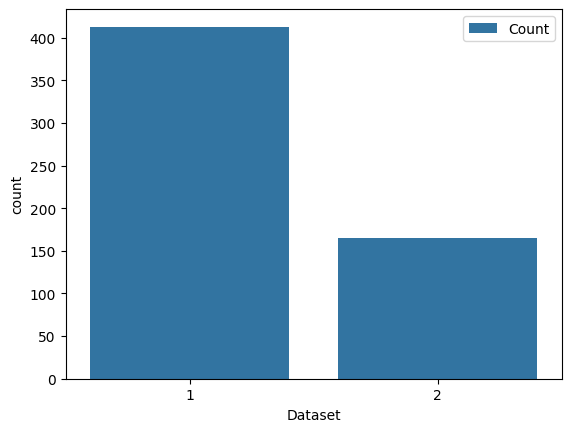

In [12]:
# Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(x='Dataset',data=liverdf, label='Count')
ld,nld = liverdf['Dataset'].value_counts()
print('Number of patients suffering from liver disease: ',ld)
print('Number of patients not suffering from liver disease: ',nld)

Number of Male patients:  439
Number of Female patients:  139


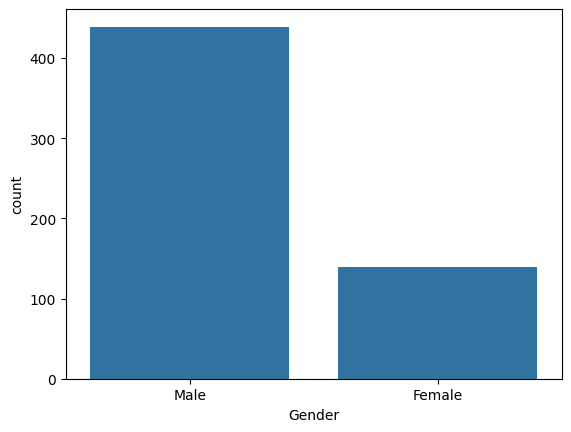

In [13]:
#Number of Male and Female patients
sns.countplot(x='Gender',data=liverdf)
m,f = liverdf['Gender'].value_counts()
print('Number of Male patients: ',m)
print('Number of Female patients: ',f)

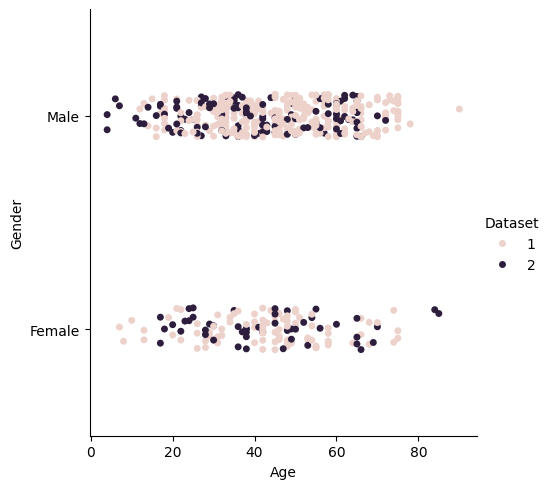

In [14]:
#age vs gender
sns.catplot(x="Age", y="Gender", hue='Dataset', data=liverdf);

In [15]:
liverdf[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.897959
3,2,Male,40.715517
0,1,Female,43.088889
1,1,Male,46.938080


Text(0.5, 0.98, 'Disease by Gender and Age')

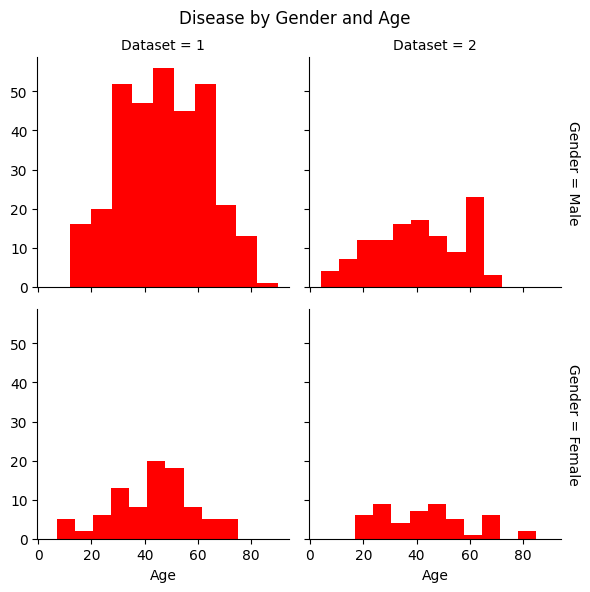

In [16]:
#Age vs Gender
g = sns.FacetGrid(liverdf, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

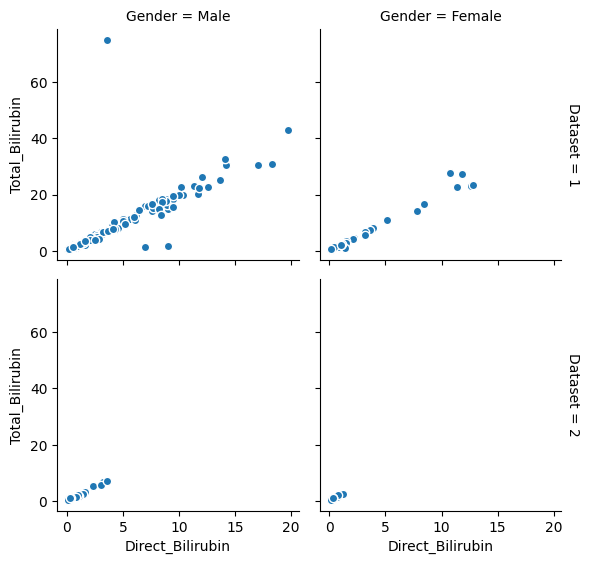

In [17]:
#  Gender(Male/Female) with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(liverdf, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

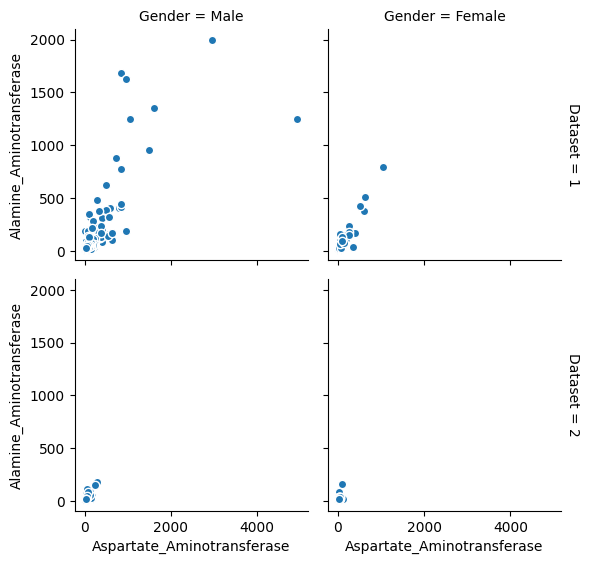

In [18]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(liverdf, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

Feature Engineering

In [20]:
liverdf = pd.concat([liverdf,pd.get_dummies(liverdf['Gender'], prefix = 'Gender')], axis=1)
liverdf.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,False,True,False,True
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,False,True,False,True
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,False,True,False,True
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,False,True,False,True
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1,False,True,False,True


In [22]:
liverdf.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,578.000000,578.000000,578.00000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,44.747405,3.319896,1.49654,291.546713,81.238754,110.574394,6.481142,3.138235,0.947145,1.285467
std,16.213968,6.232158,2.81834,243.734041,183.321431,290.075539,1.085500,0.795094,0.319863,0.452028
min,4.000000,0.400000,0.10000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.20000,175.250000,23.250000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.30000,208.500000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.30000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.70000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [24]:
liverdf[liverdf['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male,Gender_Female,Gender_Male


In [26]:
liverdf["Albumin_and_Globulin_Ratio"] = liverdf.Albumin_and_Globulin_Ratio.fillna(liverdf['Albumin_and_Globulin_Ratio'].mean())

In [28]:
X = liverdf.drop(['Gender','Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,False,True,False,True
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,False,True,False,True
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,False,True,False,True


In [52]:
y = liverdf['Dataset']
y.unique()

array([1, 2])

correlations

In [32]:
X.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Gender_Female,Gender_Male
Age,1.000000,0.011925,0.007866,0.079924,-0.087158,-0.019839,-0.187148,-0.265016,-0.216386,-0.059946,0.059946,-0.059946,0.059946
Total_Bilirubin,0.011925,1.000000,0.874440,0.205491,0.213173,0.237148,-0.007694,-0.221980,-0.206410,-0.087030,0.087030,-0.087030,0.087030
Direct_Bilirubin,0.007866,0.874440,1.000000,0.233727,0.232950,0.256826,0.000285,-0.228291,-0.200297,-0.097929,0.097929,-0.097929,0.097929
Alkaline_Phosphotase,0.079924,0.205491,0.233727,1.000000,0.124546,0.166384,-0.026850,-0.163300,-0.234318,0.030770,-0.030770,0.030770,-0.030770
Alamine_Aminotransferase,-0.087158,0.213173,0.232950,0.124546,1.000000,0.791822,-0.042259,-0.028536,-0.002466,-0.080476,0.080476,-0.080476,0.080476
Aspartate_Aminotransferase,-0.019839,0.237148,0.256826,0.166384,0.791822,1.000000,-0.025593,-0.084813,-0.070129,-0.078664,0.078664,-0.078664,0.078664
Total_Protiens,-0.187148,-0.007694,0.000285,-0.026850,-0.042259,-0.025593,1.000000,0.783095,0.234984,0.094513,-0.094513,0.094513,-0.094513
Albumin,-0.265016,-0.221980,-0.228291,-0.163300,-0.028536,-0.084813,0.783095,1.000000,0.689722,0.095218,-0.095218,0.095218,-0.095218
Albumin_and_Globulin_Ratio,-0.216386,-0.206410,-0.200297,-0.234318,-0.002466,-0.070129,0.234984,0.689722,1.000000,0.003886,-0.003886,0.003886,-0.003886
Gender_Female,-0.059946,-0.087030,-0.097929,0.030770,-0.080476,-0.078664,0.094513,0.095218,0.003886,1.000000,-1.000000,1.000000,-1.000000


Text(0.5, 1.0, 'Correlation between all the features')

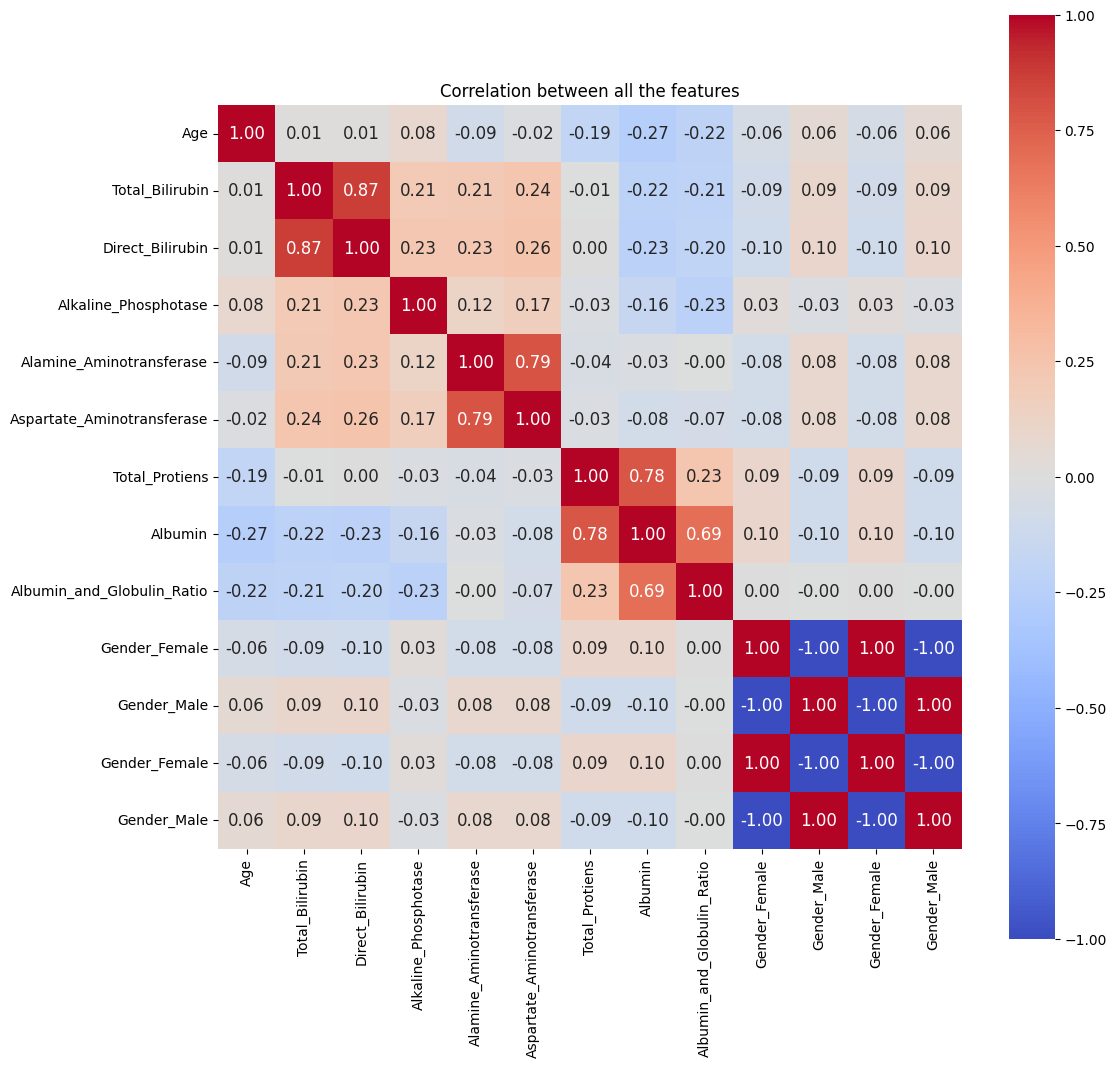

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'coolwarm')
plt.title('Correlation between all the features')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(387, 13)
(387,)
(191, 13)
(191,)


Models

In [43]:
#Logistic Regression
logistic_regression= LogisticRegression()

logistic_regression.fit(X_train, y_train)

logistic_predict= logistic_regression.predict(X_test)

logistic_score = round(logistic_regression.score(X_train, y_train) * 100, 2)
logistic_score_test = round(logistic_regression.score(X_test, y_test) * 100, 2)


print('Training Score of Logistic Regression: \n', logistic_score)
print('Test Score of Logistic Regression: \n', logistic_score_test)

print('Accuracy: \n', accuracy_score(y_test,logistic_predict))
print('Confusion Matrix: \n', confusion_matrix(y_test,logistic_predict))
print('Classification Report: \n', classification_report(y_test,logistic_predict))

Training Score of Logistic Regression: 
 74.42
Test Score of Logistic Regression: 
 71.73
Accuracy: 
 0.7172774869109948
Confusion Matrix: 
 [[124  13]
 [ 41  13]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.91      0.82       137
           2       0.50      0.24      0.33        54

    accuracy                           0.72       191
   macro avg       0.63      0.57      0.57       191
weighted avg       0.68      0.72      0.68       191



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

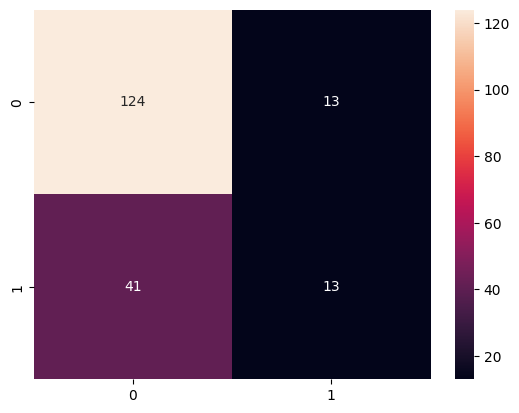

In [38]:
sns.heatmap(confusion_matrix(y_test,logistic_predict),annot=True,fmt="d")

In [44]:
# Gaussian Naive Bayes
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
NB_predict = Naive_Bayes.predict(X_test)

NB_score = round(Naive_Bayes.score(X_train, y_train) * 100, 2)
NB_score_test = round(Naive_Bayes.score(X_test, y_test) * 100, 2)
print('Training Score of Gaussian Naive Bayes: \n', NB_score)
print('Test Score of Gaussian Naive Bayes: \n', NB_score_test)
print('Accuracy: \n', accuracy_score(y_test, NB_predict))
print('Confusion Matrix: \n',confusion_matrix(y_test,NB_predict))
print('Classification Report: \n',classification_report(y_test,NB_predict))

Training Score of Gaussian Naive Bayes: 
 58.14
Test Score of Gaussian Naive Bayes: 
 56.54
Accuracy: 
 0.5654450261780105
Confusion Matrix: 
 [[57 80]
 [ 3 51]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.42      0.58       137
           2       0.39      0.94      0.55        54

    accuracy                           0.57       191
   macro avg       0.67      0.68      0.57       191
weighted avg       0.79      0.57      0.57       191



<Axes: >

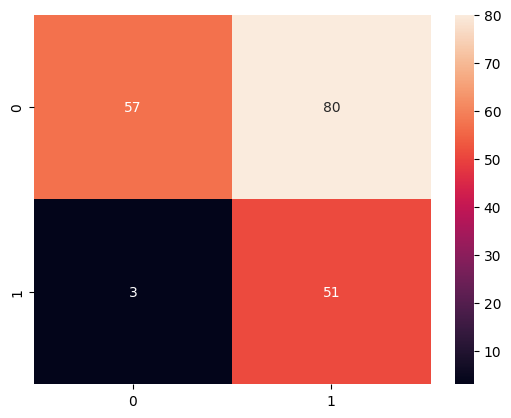

In [45]:
sns.heatmap(confusion_matrix(y_test,NB_predict),annot=True,fmt="d")

In [46]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

rf_predict = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Training Score of Random Forest: \n', random_forest_score)
print('Test Score of Random Forest: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predict))
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_predict))
print('Classification Report: \n',classification_report(y_test,rf_predict))

Training Score of Random Forest: 
 100.0
Test Score of Random Forest: 
 74.35
Accuracy: 
 0.743455497382199
Confusion Matrix: 
 [[122  15]
 [ 34  20]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.89      0.83       137
           2       0.57      0.37      0.45        54

    accuracy                           0.74       191
   macro avg       0.68      0.63      0.64       191
weighted avg       0.72      0.74      0.72       191



<Axes: >

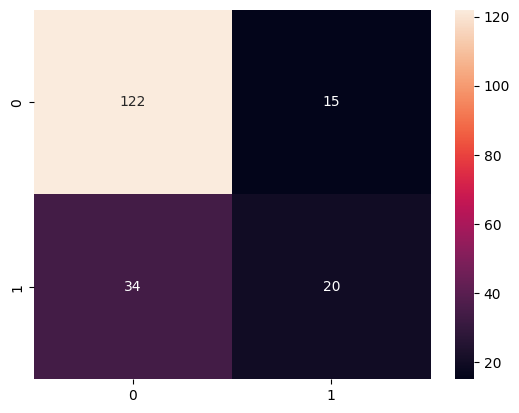

In [48]:
sns.heatmap(confusion_matrix(y_test,rf_predict),annot=True,fmt="d")

In [49]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logistic_score, NB_score, random_forest_score],
    'Test Score': [ logistic_score_test, NB_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
2,Random Forest,100.00,74.35
0,Logistic Regression,74.42,71.73
1,Gaussian Naive Bayes,58.14,56.54


In [50]:
import pickle
filename = 'random_forest_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [53]:
filename = 'random_forest_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [60]:
data = np.array([[34,6.1,7.8,367,20,32,7.0,3.4,0.78,1,0,1,0]])
predictions = loaded_model.predict(data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
